#  ShAI Project 
### Credit Card Customer Segmentation

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

importing the data

In [69]:
data= pd.read_csv('CC GENERAL.csv')
data.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Data preprocessing

In [71]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [72]:
data.duplicated().sum()

0

In [73]:
data=data.drop("CUST_ID", axis=1)

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

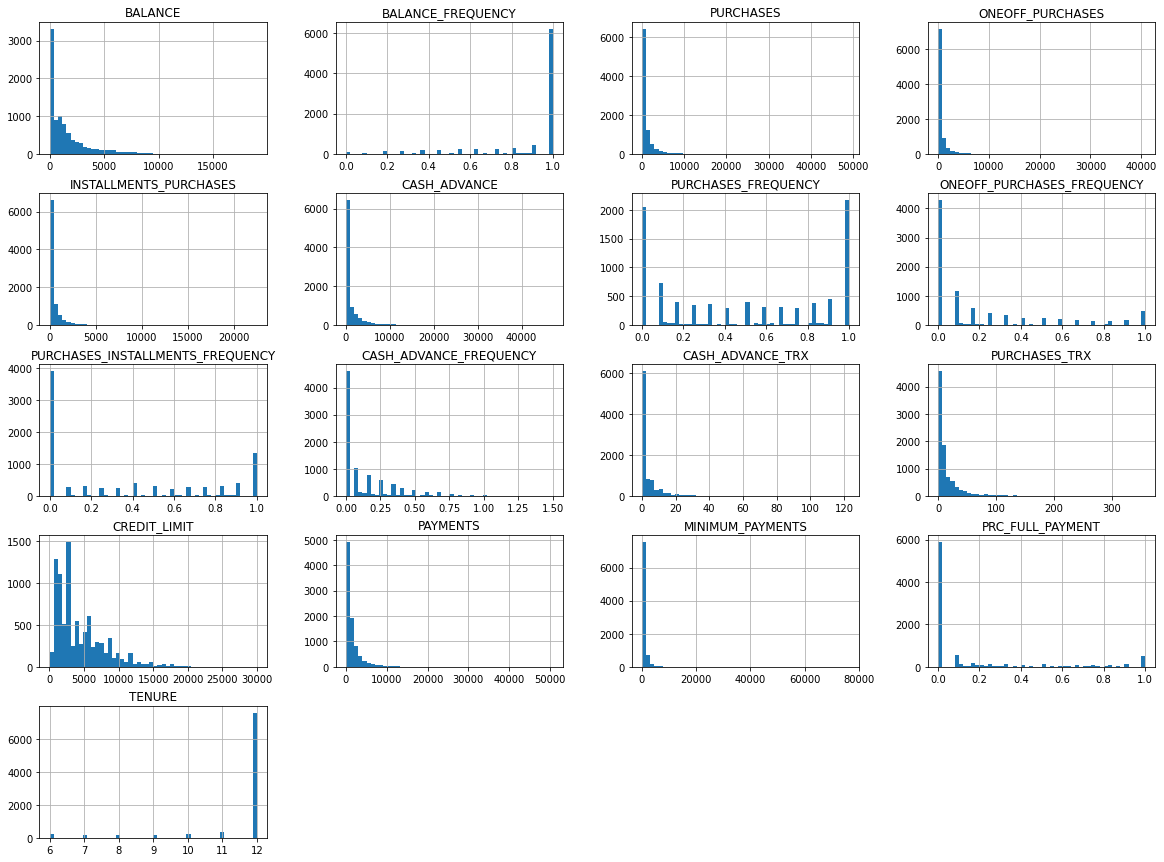

In [74]:
data.hist(bins=50, figsize=(20,15))

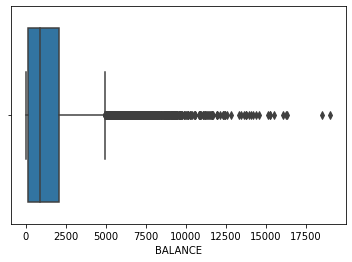

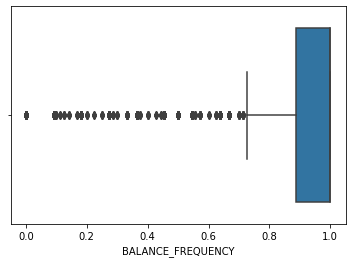

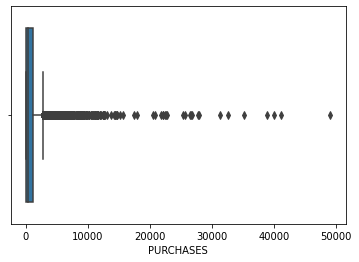

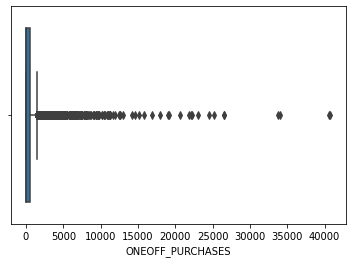

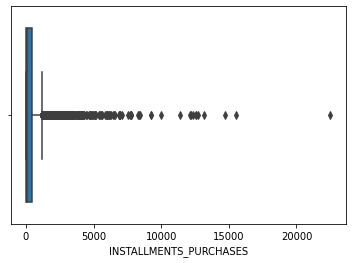

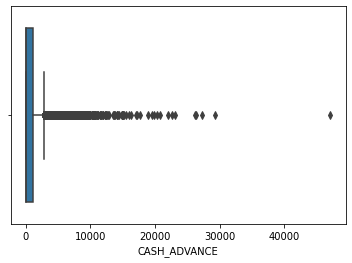

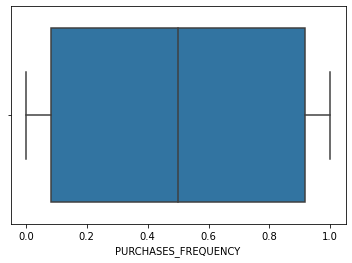

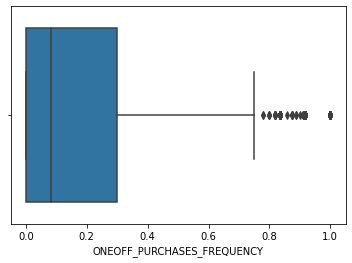

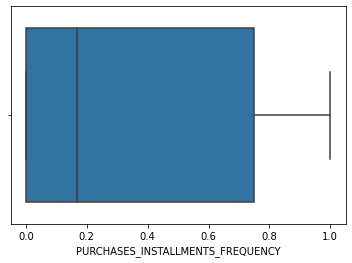

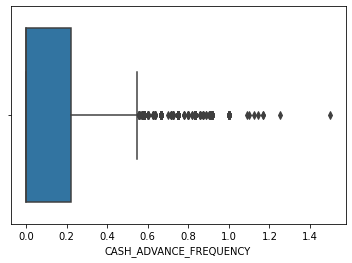

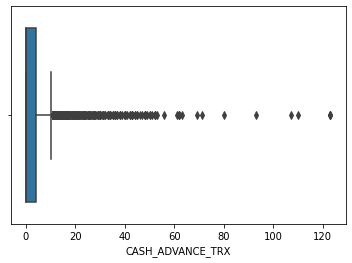

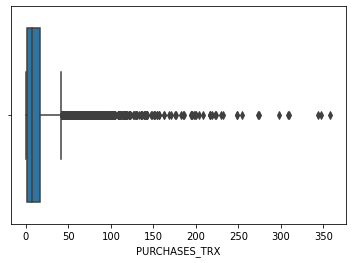

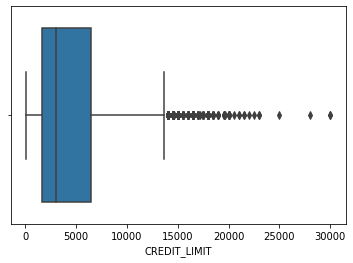

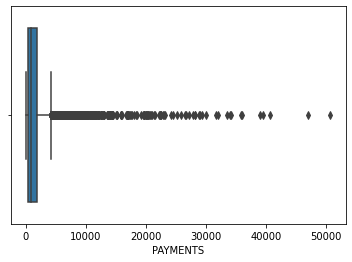

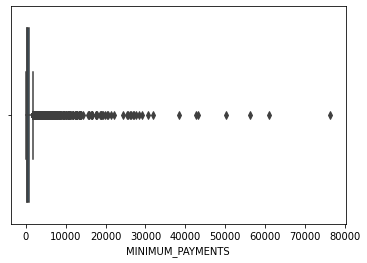

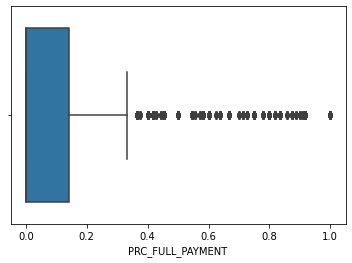

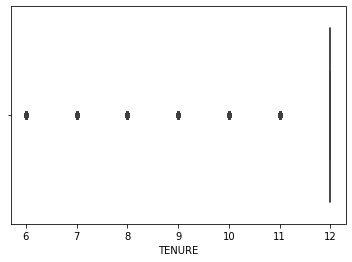

In [75]:
def boxplot(df,ft):
    sns.boxplot(x = ft, data = df)
    plt.show()

for col in data:
    boxplot(data,col)

 from here we can extract the outliers : 
 
BALANCE > 17500 

BALANCE_FREQUENCY == 0 

PURCHASES > 30000 

ONEOFF_PURCHASES > 30000 

INSTALLMENTS_PURCHASES > 20000 

CASH_ADVANCE > 40000 

CASH_ADVANCE_FREQUENCY > 1.4 

CASH_ADVANCE_TRX > 80 

CREDIT_LIMIT >= 25000 

PAYMENTS > 45000 

MINIMUM_PAYMENTS > 35000


Dropping Null values

In [84]:

data.dropna(axis=0,inplace=True)


Normalizing the data

In [86]:
from sklearn.preprocessing import Normalizer

nr = Normalizer()
data_normalized = nr.fit_transform(data)
data_normalized.var()

0.047835383739192675

Deleting outliers

In [85]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df
data=remove_outliers(data,data.columns,3)

Working on column: BALANCE
Working on column: BALANCE_FREQUENCY
Working on column: PURCHASES
Working on column: ONEOFF_PURCHASES
Working on column: INSTALLMENTS_PURCHASES
Working on column: CASH_ADVANCE
Working on column: PURCHASES_FREQUENCY
Working on column: ONEOFF_PURCHASES_FREQUENCY
Working on column: PURCHASES_INSTALLMENTS_FREQUENCY
Working on column: CASH_ADVANCE_FREQUENCY
Working on column: CASH_ADVANCE_TRX
Working on column: PURCHASES_TRX
Working on column: CREDIT_LIMIT
Working on column: PAYMENTS
Working on column: MINIMUM_PAYMENTS
Working on column: PRC_FULL_PAYMENT
Working on column: TENURE


## Modeling 

### K-means

In [96]:
from sklearn.cluster import KMeans

data_kmeans = KMeans(n_clusters=5, n_init = 100, random_state = 1)
data_kmeans = data_kmeans.fit(data_normalized)
data_kmeans.labels_

array([3, 2, 2, ..., 3, 3, 1])

#### Inertia metric

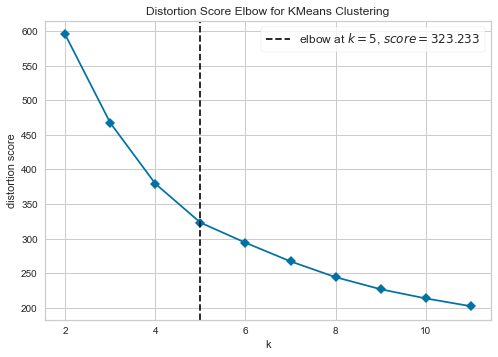

In [97]:
from yellowbrick.cluster import KElbowVisualizer
data_visualizer = KElbowVisualizer(data_kmeans, k=(2,12), timings=False)

data_visualizer.fit(data_normalized)
data_visualizer.show()
plt.show()

From above we find Elbow at k=5 , which shows that the optimal number of clusters is 5 (if we used Inertia as a metric)

#### Silhouette score

In [98]:
from sklearn.metrics import silhouette_score

silhouette_score(data_normalized, data_kmeans.labels_)

0.3066705491199778

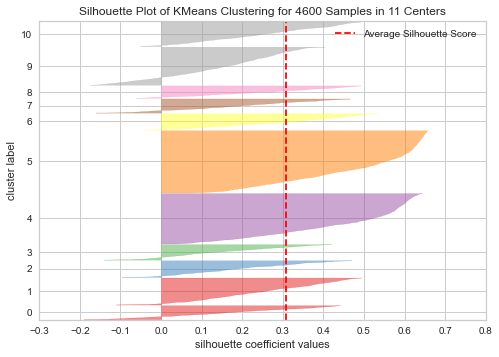

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4600 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [100]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(data_kmeans)
visualizer.fit(data_normalized, axis=1)
visualizer.show()

### DBSCAN

In [101]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(data_normalized)

DBSCAN(eps=0.05)

In [102]:
dbscan.labels_

array([-1, -1, -1, ...,  2,  2, -1], dtype=int64)

In [103]:
dbscan.core_sample_indices_


array([   6,    7,    8, ..., 4595, 4596, 4597], dtype=int64)

### Gaussian Mixtures (GMM)

In [106]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(data_normalized)




GaussianMixture(n_components=3, n_init=10)

In [107]:
gm.weights_

array([0.26959826, 0.38248304, 0.3479187 ])

In [108]:
gm.means_


array([[3.64266030e-01, 3.65767502e-04, 2.19925441e-01, 1.13072079e-01,
        1.07422600e-01, 1.34523270e-01, 2.27176208e-04, 5.89257181e-05,
        1.77091206e-04, 3.69942106e-05, 6.60836316e-04, 4.13769536e-03,
        6.54612416e-01, 3.10968868e-01, 2.00538416e-01, 1.67447773e-05,
        4.45969069e-03],
       [7.71115469e-02, 2.96335108e-04, 1.39735910e-01, 4.87571169e-02,
        9.09809449e-02, 2.70712611e-06, 2.28815515e-04, 2.96788691e-05,
        1.94797618e-04, 1.40501074e-08, 1.60895441e-07, 3.35882866e-03,
        9.36462989e-01, 1.59368224e-01, 5.98898446e-02, 5.92341708e-05,
        4.35071763e-03],
       [4.10372559e-01, 3.50871244e-04, 1.23131069e-02, 1.23085197e-02,
        4.58724172e-06, 2.48230872e-01, 1.32692458e-05, 1.32039724e-05,
        5.67678328e-08, 6.66462429e-05, 1.08187880e-03, 1.98034541e-04,
        7.33334316e-01, 2.41714953e-01, 1.46262016e-01, 1.12562945e-05,
        4.48064135e-03]])

In [109]:
gm.covariances_


array([[[ 3.92657477e-02,  5.06723284e-06, -1.09025576e-02,
         -6.77679862e-03, -4.23139812e-03, -2.07034774e-03,
         -8.95569583e-07, -1.99009363e-06,  7.75006597e-07,
         -4.67705131e-07, -5.89304392e-06, -3.69567959e-05,
         -3.60515020e-03, -1.31406746e-02,  1.50460690e-02,
         -4.47490442e-06, -1.40791477e-06],
        [ 5.06723284e-06,  1.04079478e-06,  6.16692801e-06,
          2.64876962e-06,  3.53595725e-06, -5.47669098e-06,
          1.86382299e-08,  5.50738782e-09,  1.28408828e-08,
          1.55953930e-09,  2.08217994e-08,  2.33508142e-07,
         -7.88318029e-06,  1.01834424e-06,  8.96244852e-06,
          8.94321118e-10,  4.35708957e-07],
        [-1.09025576e-02,  6.16692801e-06,  2.29652035e-02,
          1.50707399e-02,  7.88350343e-03, -7.46439488e-03,
          8.46229130e-06,  5.86108091e-06,  4.49667109e-06,
         -8.01518567e-07, -1.78184158e-05,  2.38258349e-04,
         -8.74659426e-03,  5.35571999e-03, -3.75998280e-03,
          2.